In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import tensorflow as tf
from tensorflow import keras
import sklearn

In [2]:
strikers_wingers = pd.read_csv('C:/Users/shreyas/Documents/Football Strikers/StrikerPerformance.csv')

In [3]:
strikers_wingers.head()

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,17/18 goals,17/18 minutes,age,current club,current league,foot,height,name,nationality,position
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,3.0,1194.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Dmitri Poloz,Russia,W
1,NaN,NaN,NaN,NaN,0.0,26.0,1.0,1255.0,6.0,48.0,...,6.0,1433.0,25,Zenit St. Petersburg,Premier Liga,both,180.0,Emiliano Rigoni,Argentina Italy,W
2,NaN,NaN,NaN,NaN,0.0,7.0,1.0,296.0,4.0,37.0,...,3.0,1571.0,22,Zenit St. Petersburg,Premier Liga,both,179.0,Sebastián Driussi,Argentina Italy,CF
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,19.0,2911.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Aleksandr Kokorin,Russia,CF
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,NaN,NaN,...,4.0,2019.0,26,Zenit St. Petersburg,Premier Liga,right,188.0,Anton Zabolotnyi,Russia,CF


In [4]:
strikers_wingers_personal_info = strikers_wingers[['name','age','position','foot','height','current league','current club','nationality']]

In [5]:
strikers_wingers_personal_info

,name,age,position,foot,height,current league,current club,nationality
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia
1,Emiliano Rigoni,25,W,both,180.0,Premier Liga,Zenit St. Petersburg,Argentina Italy
2,Sebastián Driussi,22,CF,both,179.0,Premier Liga,Zenit St. Petersburg,Argentina Italy
3,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia
4,Anton Zabolotnyi,26,CF,right,188.0,Premier Liga,Zenit St. Petersburg,Russia
5,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname
6,Pedro Rocha,23,W,right,175.0,Premier Liga,Spartak Moscow,Brazil
7,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay
8,Zelimkhan Bakaev,21,W,left,180.0,Premier Liga,Spartak 2 Moscow,Russia
9,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil


In [6]:
strikers_wingers_match_info = strikers_wingers.drop(['name','age','position','foot','height','current league','current club', 'nationality'], axis=1)
strikers_wingers_match_info

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,15/16 goals,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,7.0,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0
1,NaN,NaN,NaN,NaN,0.0,26.0,1.0,1255.0,6.0,48.0,...,5.0,1533.0,2.0,31.0,11.0,2427.0,3.0,21.0,6.0,1433.0
2,NaN,NaN,NaN,NaN,0.0,7.0,1.0,296.0,4.0,37.0,...,1.0,914.0,3.0,35.0,21.0,2517.0,4.0,31.0,3.0,1571.0
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,8.0,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,NaN,NaN,...,5.0,1500.0,5.0,34.0,16.0,2562.0,2.0,24.0,4.0,2019.0
5,11.0,42.0,17.0,3678.0,8.0,31.0,11.0,2730.0,5.0,29.0,...,18.0,2806.0,10.0,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,34.0,...,2.0,953.0,6.0,23.0,7.0,1753.0,2.0,10.0,1.0,449.0
7,5.0,40.0,2.0,3588.0,2.0,25.0,10.0,1782.0,0.0,15.0,...,11.0,1794.0,0.0,22.0,2.0,804.0,5.0,25.0,6.0,1092.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,597.0,2.0,31.0,0.0,1573.0,0.0,12.0,1.0,775.0
9,9.0,32.0,15.0,2455.0,4.0,39.0,31.0,3120.0,11.0,33.0,...,6.0,1504.0,1.0,15.0,2.0,591.0,7.0,29.0,11.0,2513.0


In [7]:
strikers_wingers_info = pd.concat([strikers_wingers_personal_info, strikers_wingers_match_info], axis="columns")
strikers_wingers_info = strikers_wingers_info.dropna().reset_index().drop('index', axis=1)
strikers_wingers_info

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,15/16 goals,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,7.0,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,8.0,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,18.0,2806.0,10.0,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,11.0,1794.0,0.0,22.0,2.0,804.0,5.0,25.0,6.0,1092.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,6.0,1504.0,1.0,15.0,2.0,591.0,7.0,29.0,11.0,2513.0
5,Zé Luís,27,CF,left,184.0,Premier Liga,Spartak Moscow,Cape Verde,1.0,35.0,...,10.0,1768.0,7.0,24.0,5.0,1703.0,7.0,16.0,4.0,1022.0
6,Ahmed Musa,25,CF,both,170.0,Premier Liga,CSKA Moscow,Nigeria,7.0,35.0,...,18.0,3858.0,0.0,32.0,4.0,1335.0,3.0,12.0,2.0,1075.0
7,Wanderson,23,W,right,175.0,Premier Liga,FK Krasnodar,Brazil Belgium,1.0,6.0,...,2.0,1175.0,11.0,28.0,5.0,1543.0,2.0,23.0,3.0,1236.0
8,Joãozinho,29,W,left,166.0,Premier Liga,FK Krasnodar,Russia Brazil,16.0,31.0,...,2.0,991.0,5.0,33.0,6.0,1809.0,1.0,19.0,2.0,898.0
9,Ricardo Laborde,30,W,right,174.0,Premier Liga,FK Krasnodar,Colombia,9.0,29.0,...,3.0,1290.0,3.0,27.0,3.0,877.0,0.0,7.0,2.0,214.0


In [8]:
strikers_wingers_info['total goals'] = strikers_wingers_info['12/13 goals'] + strikers_wingers_info['13/14 goals'] + strikers_wingers_info['14/15 goals'] + strikers_wingers_info['15/16 goals'] + strikers_wingers_info['16/17 goals'] + strikers_wingers_info['17/18 goals']
strikers_wingers_info

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,total goals
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,32.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,70.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,2806.0,10.0,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0,86.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,1794.0,0.0,22.0,2.0,804.0,5.0,25.0,6.0,1092.0,32.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,1504.0,1.0,15.0,2.0,591.0,7.0,29.0,11.0,2513.0,86.0
5,Zé Luís,27,CF,left,184.0,Premier Liga,Spartak Moscow,Cape Verde,1.0,35.0,...,1768.0,7.0,24.0,5.0,1703.0,7.0,16.0,4.0,1022.0,48.0
6,Ahmed Musa,25,CF,both,170.0,Premier Liga,CSKA Moscow,Nigeria,7.0,35.0,...,3858.0,0.0,32.0,4.0,1335.0,3.0,12.0,2.0,1075.0,59.0
7,Wanderson,23,W,right,175.0,Premier Liga,FK Krasnodar,Brazil Belgium,1.0,6.0,...,1175.0,11.0,28.0,5.0,1543.0,2.0,23.0,3.0,1236.0,14.0
8,Joãozinho,29,W,left,166.0,Premier Liga,FK Krasnodar,Russia Brazil,16.0,31.0,...,991.0,5.0,33.0,6.0,1809.0,1.0,19.0,2.0,898.0,32.0
9,Ricardo Laborde,30,W,right,174.0,Premier Liga,FK Krasnodar,Colombia,9.0,29.0,...,1290.0,3.0,27.0,3.0,877.0,0.0,7.0,2.0,214.0,25.0


In [9]:
strikers_wingers_info['total assists'] = strikers_wingers_info['12/13 assists'] + strikers_wingers_info['13/14 assists'] + strikers_wingers_info['14/15 assists'] + strikers_wingers_info['15/16 assists'] + strikers_wingers_info['16/17 assists'] + strikers_wingers_info['17/18 assists']
strikers_wingers_info

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,total goals,total assists
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,32.0,28.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,70.0,35.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,10.0,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0,86.0,50.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,0.0,22.0,2.0,804.0,5.0,25.0,6.0,1092.0,32.0,15.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,1.0,15.0,2.0,591.0,7.0,29.0,11.0,2513.0,86.0,36.0
5,Zé Luís,27,CF,left,184.0,Premier Liga,Spartak Moscow,Cape Verde,1.0,35.0,...,7.0,24.0,5.0,1703.0,7.0,16.0,4.0,1022.0,48.0,30.0
6,Ahmed Musa,25,CF,both,170.0,Premier Liga,CSKA Moscow,Nigeria,7.0,35.0,...,0.0,32.0,4.0,1335.0,3.0,12.0,2.0,1075.0,59.0,31.0
7,Wanderson,23,W,right,175.0,Premier Liga,FK Krasnodar,Brazil Belgium,1.0,6.0,...,11.0,28.0,5.0,1543.0,2.0,23.0,3.0,1236.0,14.0,24.0
8,Joãozinho,29,W,left,166.0,Premier Liga,FK Krasnodar,Russia Brazil,16.0,31.0,...,5.0,33.0,6.0,1809.0,1.0,19.0,2.0,898.0,32.0,48.0
9,Ricardo Laborde,30,W,right,174.0,Premier Liga,FK Krasnodar,Colombia,9.0,29.0,...,3.0,27.0,3.0,877.0,0.0,7.0,2.0,214.0,25.0,27.0


In [10]:
strikers_wingers_info['total minutes'] = strikers_wingers_info['12/13 minutes'] + strikers_wingers_info['13/14 minutes'] + strikers_wingers_info['14/15 minutes'] + strikers_wingers_info['15/16 minutes'] + strikers_wingers_info['16/17 minutes'] + strikers_wingers_info['17/18 minutes']
strikers_wingers_info

,name,age,position,foot,height,current league,current club,nationality,12/13 assists,12/13 games,...,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,total goals,total assists,total minutes
0,Dmitri Poloz,26,W,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,1.0,22.0,...,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,32.0,28.0,10150.0
1,Aleksandr Kokorin,26,CF,right,183.0,Premier Liga,Zenit St. Petersburg,Russia,5.0,26.0,...,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,70.0,35.0,14073.0
2,Quincy Promes,26,W,both,174.0,Premier Liga,Spartak Moscow,Netherlands Suriname,11.0,42.0,...,29.0,12.0,2474.0,8.0,28.0,15.0,2427.0,86.0,50.0,16614.0
3,Lorenzo Melgarejo,27,W,left,178.0,Premier Liga,Spartak Moscow,Paraguay,5.0,40.0,...,22.0,2.0,804.0,5.0,25.0,6.0,1092.0,32.0,15.0,10050.0
4,Luiz Adriano,30,CF,right,183.0,Premier Liga,Spartak Moscow,Brazil,9.0,32.0,...,15.0,2.0,591.0,7.0,29.0,11.0,2513.0,86.0,36.0,12864.0
5,Zé Luís,27,CF,left,184.0,Premier Liga,Spartak Moscow,Cape Verde,1.0,35.0,...,24.0,5.0,1703.0,7.0,16.0,4.0,1022.0,48.0,30.0,9277.0
6,Ahmed Musa,25,CF,both,170.0,Premier Liga,CSKA Moscow,Nigeria,7.0,35.0,...,32.0,4.0,1335.0,3.0,12.0,2.0,1075.0,59.0,31.0,15401.0
7,Wanderson,23,W,right,175.0,Premier Liga,FK Krasnodar,Brazil Belgium,1.0,6.0,...,28.0,5.0,1543.0,2.0,23.0,3.0,1236.0,14.0,24.0,7846.0
8,Joãozinho,29,W,left,166.0,Premier Liga,FK Krasnodar,Russia Brazil,16.0,31.0,...,33.0,6.0,1809.0,1.0,19.0,2.0,898.0,32.0,48.0,11771.0
9,Ricardo Laborde,30,W,right,174.0,Premier Liga,FK Krasnodar,Colombia,9.0,29.0,...,27.0,3.0,877.0,0.0,7.0,2.0,214.0,25.0,27.0,6593.0


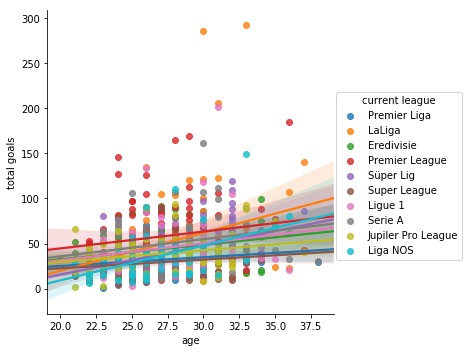

In [11]:
sns.lmplot(x='age', y='total goals', data=strikers_wingers_info, hue='current league')

In [12]:
top_10_goal_scorers = strikers_wingers_info[['name','current club','age','total goals']]
top_10_goal_scorers = top_10_goal_scorers.sort_values('total goals', ascending=False)
top_10_goal_scorers = top_10_goal_scorers.nlargest(10, 'total goals')
top_10_goal_scorers

,name,current club,age,total goals
60,Cristiano Ronaldo,Real Madrid,33,293.0
56,Lionel Messi,FC Barcelona,30,286.0
58,Luis Suárez,FC Barcelona,31,206.0
481,Edinson Cavani,Paris Saint-Germain,31,201.0
231,Zlatan Ibrahimovic,Manchester United,36,185.0
226,Sergio Agüero,Manchester City,29,169.0
245,Pierre-Emerick Aubameyang,Arsenal FC,28,165.0
549,Gonzalo Higuaín,Juventus FC,30,162.0
698,Jonas,SL Benfica,33,149.0
235,Harry Kane,Tottenham Hotspur,24,146.0


C:\Users\shreyas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


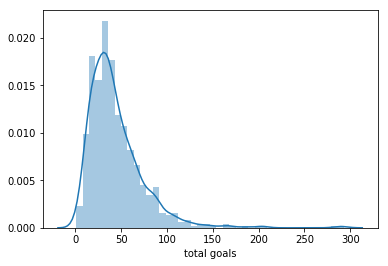

In [13]:
sns.distplot(strikers_wingers_info['total goals'])

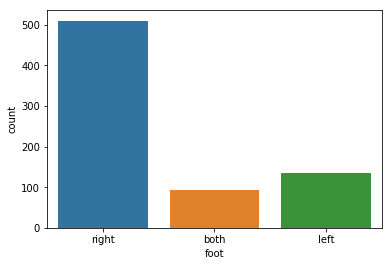

In [14]:
sns.countplot(x='foot', data=strikers_wingers_info)

In [15]:
foot_goals = strikers_wingers_info[['foot','total goals']]
foot_goals = foot_goals.groupby('foot', as_index=False)
foot_goals = foot_goals.aggregate(np.mean)
foot_goals

,foot,total goals
0,both,47.595745
1,left,41.768657
2,right,44.374510


In [16]:
league_goals_mean = strikers_wingers_info[['current league','total goals', 'total minutes']]
league_goals_mean = league_goals_mean.groupby('current league', as_index = False)
league_goals_mean = league_goals_mean.aggregate(np.mean)
league_goals_mean

,current league,total goals,total minutes
0,Eredivisie,41.267606,10363.281690
1,Jupiler Pro League,38.741935,10719.000000
2,LaLiga,52.525773,12197.164948
3,Liga NOS,35.192308,9993.307692
4,Ligue 1,44.323529,10982.573529
5,Premier League,58.353535,13615.141414
6,Premier Liga,32.357143,9286.946429
7,Serie A,49.487179,11640.538462
8,Super League,29.838710,9003.032258
9,Süper Lig,44.430108,10805.698925


In [17]:
top_strikers = pd.DataFrame(columns = strikers_wingers_info.columns.tolist())
for index,row in league_goals_mean.iterrows():
     top_strikers = pd.concat([top_strikers, strikers_wingers_info[(strikers_wingers_info['current league'] == row['current league']) & (strikers_wingers_info['total goals'] >= row['total goals'])]])

top_strikers = top_strikers.reset_index()
top_strikers = top_strikers[['name','current league','current club','total goals']]
top_strikers

,name,current league,current club,total goals
0,Klaas-Jan Huntelaar,Eredivisie,Ajax Amsterdam,75.0
1,Gastón Pereiro,Eredivisie,PSV Eindhoven,43.0
2,Luuk de Jong,Eredivisie,PSV Eindhoven,86.0
3,Steven Berghuis,Eredivisie,Feyenoord Rotterdam,55.0
4,Nicolai Jörgensen,Eredivisie,Feyenoord Rotterdam,86.0
5,Robin van Persie,Eredivisie,Feyenoord Rotterdam,99.0
6,Alireza Jahanbakhsh,Eredivisie,AZ Alkmaar,58.0
7,Wout Weghorst,Eredivisie,AZ Alkmaar,84.0
8,Simon Makienok,Eredivisie,FC Utrecht,42.0
9,Arber Zeneli,Eredivisie,SC Heerenveen,60.0


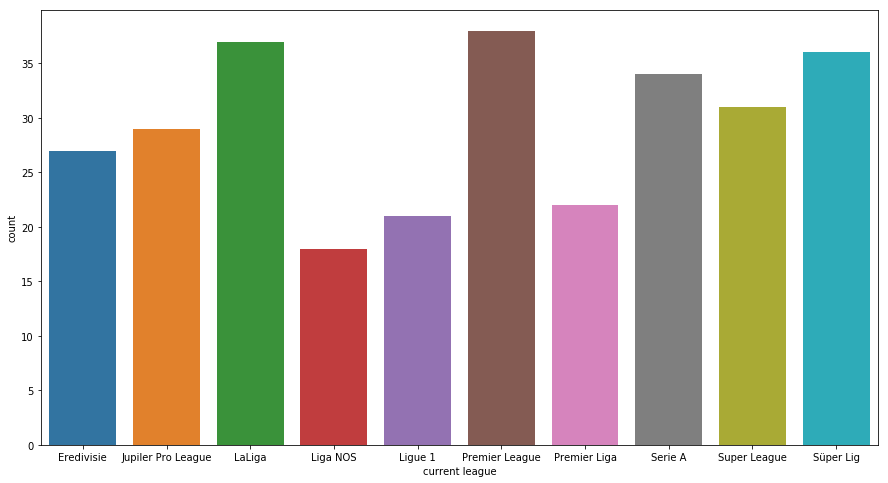

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='current league', data=top_strikers)

In [19]:
strikers_wingers_12_13 = strikers_wingers_info[['name','age','position','foot','height','current league','current club','12/13 games','12/13 minutes', '12/13 assists', '12/13 goals']]
strikers_wingers_12_13 = pd.get_dummies(strikers_wingers_12_13, columns=['position','foot','current league','current club'], prefix=['position','foot','current league','current club'])
strikers_wingers_12_13.drop('name', axis=1, inplace=True)
strikers_wingers_12_13.head()

,age,height,12/13 games,12/13 minutes,12/13 assists,12/13 goals,position_CF,position_W,foot_both,foot_left,...,current club_Vitesse Arnhem,current club_Vitória Guimarães SC,current club_Vitória Setúbal FC,current club_Waasland-Beveren,current club_Watford FC,current club_West Bromwich Albion,current club_West Ham United,current club_Willem II Tilburg,current club_Yeni Malatyaspor,current club_Zenit St. Petersburg
0,26,183.0,22.0,1057.0,1.0,3.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,183.0,26.0,2287.0,5.0,13.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,174.0,42.0,3678.0,11.0,17.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,27,178.0,40.0,3588.0,5.0,2.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,30,183.0,32.0,2455.0,9.0,15.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
goals_12_13 = strikers_wingers_12_13['12/13 goals']
strikers_wingers_12_13.drop('12/13 goals', axis=1, inplace=True)
goals_12_13.head()

0     3.0
1    13.0
2    17.0
3     2.0
4    15.0
Name: 12/13 goals, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(strikers_wingers_12_13, goals_12_13, test_size=0.3)

In [22]:
#Normalization

# mean = x_train.mean(axis=0)
# std = x_train.std(axis=0)
# x_train = (x_train - mean)/std
# x_test = (x_test - mean)/std

In [23]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu,
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               104448    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 367,617
Trainable params: 367,617
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

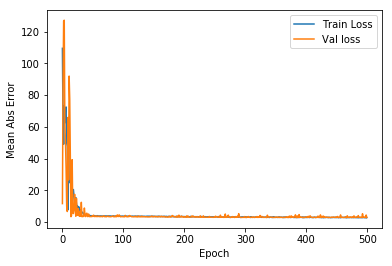

In [25]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  #plt.ylim([0, 5])

plot_history(history)


.............................................................

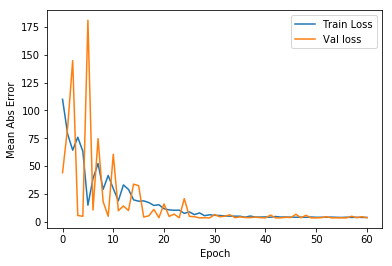

In [26]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [27]:
[loss, mae] = model.evaluate(x_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:    3.23


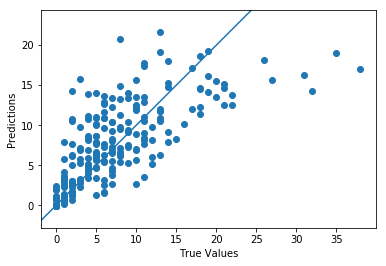

In [28]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 21.69784095695427
Test accuracy: 3.227558522611051
